In [1]:
import pandas as pd

# Data Loading

In [2]:
# Load the dataset
data = pd.read_csv("../data/job_train.csv")
data.head(15)

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0
5,"Energy/Financial Reporter, Low Carbon Energy I...","US, NY, New York",Energy/financial reporter needed in NYCDriven ...,The successful candidate should have a bachelo...,0,1,1,0
6,HR Talent Acquisition Lead,"EG, C, Cairo",Role Summary:HR Talent Acquisition Lead will b...,Experienced females are preferred.Relevant exp...,0,1,0,0
7,"Intern, Laboratory Technicain","US, IA, Cedar Rapids","Red Star Yeast Company LLC (RSYC), a leader in...",The ideal candidate will be currently enrolled...,0,1,1,0
8,Freelance Translators (m/f) from Swedish and G...,"DE, BE, Berlin",We are looking for freelance translators (m/f)...,Translation experiencePreferably also a backgr...,0,1,1,0
9,1099 Independent Contract Medical Sales,"US, VA,",We now have a unique product that any physicia...,Proven History of SalesExperince in Medical Sa...,0,1,1,0


### The dataset consists of the following columns:
##### title   --  the title of the job ad entry
##### location    --  geographical location of the job ad
##### description --  the details description of the job ad
##### requirements    --  enlisted requirements for the job opening
##### telecommuting   --  true for telecommuting positions
##### has_company_logo    --  true if company logo is present
##### has_questions   --  true if screening questions are present
##### fraudulent  --  target (1 for fraudulent, else 0)

# Basic EDA

In [3]:
# Shape of the dataset
data.shape

# the dataset consists of 8940 rows and 8 columns

(8940, 8)

In [4]:
# Data types of each column
data.dtypes

title               object
location            object
description         object
requirements        object
telecommuting        int64
has_company_logo     int64
has_questions        int64
fraudulent           int64
dtype: object

In [5]:
# Checking for missing values
data.isnull().sum()

# location : 157 missing values
# description : 1 missing value
# requirements : 1326 missing values

title                  0
location             157
description            1
requirements        1326
telecommuting          0
has_company_logo       0
has_questions          0
fraudulent             0
dtype: int64

In [6]:
# basic statistical summary
data.describe(include = 'all')

# title : 6132 unique job titles
# location : 2131 unique locations, with "GB, LND, London" being the most common
# description and requirements : large number of unique values indicating diverse job descriptions and requirements

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
count,8940,8783,8939,7614,8940.000000,8940.000000,8940.000000,8940.000000
unique,6132,2131,7767,6327,NaN,NaN,NaN,NaN
top,English Teacher Abroad,"GB, LND, London","Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,NaN,NaN,NaN,NaN
freq,152,367,187,200,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.043736,0.794407,0.487248,0.051007
std,NaN,NaN,NaN,NaN,0.204519,0.404157,0.499865,0.220024
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,0.000000


# Splitting the 'location' column into 'country', 'state', 'city'

In [7]:
# Splitting the 'location' column and replacing null values in the entire dataset
data[['country', 'state', 'city']] = data['location'].str.split(',', n=2, expand=True)
data.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent,country,state,city
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0,KW,KU,
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0,US,TX,Corpus Christi
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0,US,TX,USA Southwest
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0,AU,NSW,
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0,GB,ENG,London


In [8]:
# Investigating the presence of space characters or similar in 'country', 'state', and 'city' columns

# Checking the unique values in 'country', 'state', and 'city' to see if there are space characters or similar
unique_country = data['country'].unique()
unique_state = data['state'].unique()
unique_city = data['city'].unique()

print(len(unique_country), len(unique_state), len(unique_city))
unique_country[:25], unique_state[:25], unique_city[:25]  # Displaying only the first 25 unique values for brevity

79 272 1686


(array(['KW', 'US', 'AU', 'GB', 'EG', 'DE', 'GR', nan, 'DK', 'EE', 'NZ',
        'CA', 'PL', 'PK', 'IN', 'NL', 'PT', 'BE', 'SG', 'ES', 'RO', 'PH',
        'IT', 'BR', 'AT'], dtype=object),
 array([' KU', ' TX', ' NSW', ' ENG', ' NY', ' C', ' IA', ' BE', ' VA',
        ' CA', ' OH', ' ', ' NC', ' I', ' FL', nan, ' QLD', ' BIR', ' MLN',
        ' HH', ' STS', ' 84', ' WA', ' PA', ' 37'], dtype=object),
 array([' ', ' Corpus Christi', ' USA Southwest', ' London', ' New York',
        ' Cairo', ' Cedar Rapids', ' Berlin', ' Long Beach', ' Cincinnati',
        ' Hilliard', ' Charlotte', ' Athens',
        ' Austin, San Antonio, Houston', ' Fort Lauderdale', nan,
        ' Los Angeles', ' Brisbane', ' Edinburgh', ' Hamburg', ' Austin',
        ' Orange', ' Copenhagen', ' Boca Raton', ' Seattle'], dtype=object))

In [11]:
# filling the blanks and space character with 'Not Specified'

data.fillna('Not Specified', inplace=True)
data.head()



,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent,country,state,city
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0,KW,KU,
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0,US,TX,Corpus Christi
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0,US,TX,USA Southwest
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0,AU,NSW,
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0,GB,ENG,London


In [12]:
# Replacing single space character with 'Not Specified' across all columns in the dataset
data = data.replace(' ', 'Not Specified')

# Confirming the replacement by displaying a few rows of the dataset
data.head()

# Checking again for unique values in 'city' to confirm the replacement
unique_city_updated = data['city'].unique()
unique_city_updated[:10]  # Displaying the first 10 unique values for confirmation

array(['Not Specified', ' Corpus Christi', ' USA Southwest', ' London',
       ' New York', ' Cairo', ' Cedar Rapids', ' Berlin', ' Long Beach',
       ' Cincinnati'], dtype=object)

In [13]:
# Checking if the missing values are replaced
missing_values_recheck = data.isnull().sum()
missing_values_recheck

title               0
location            0
description         0
requirements        0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
country             0
state               0
city                0
dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# In-depth EDA

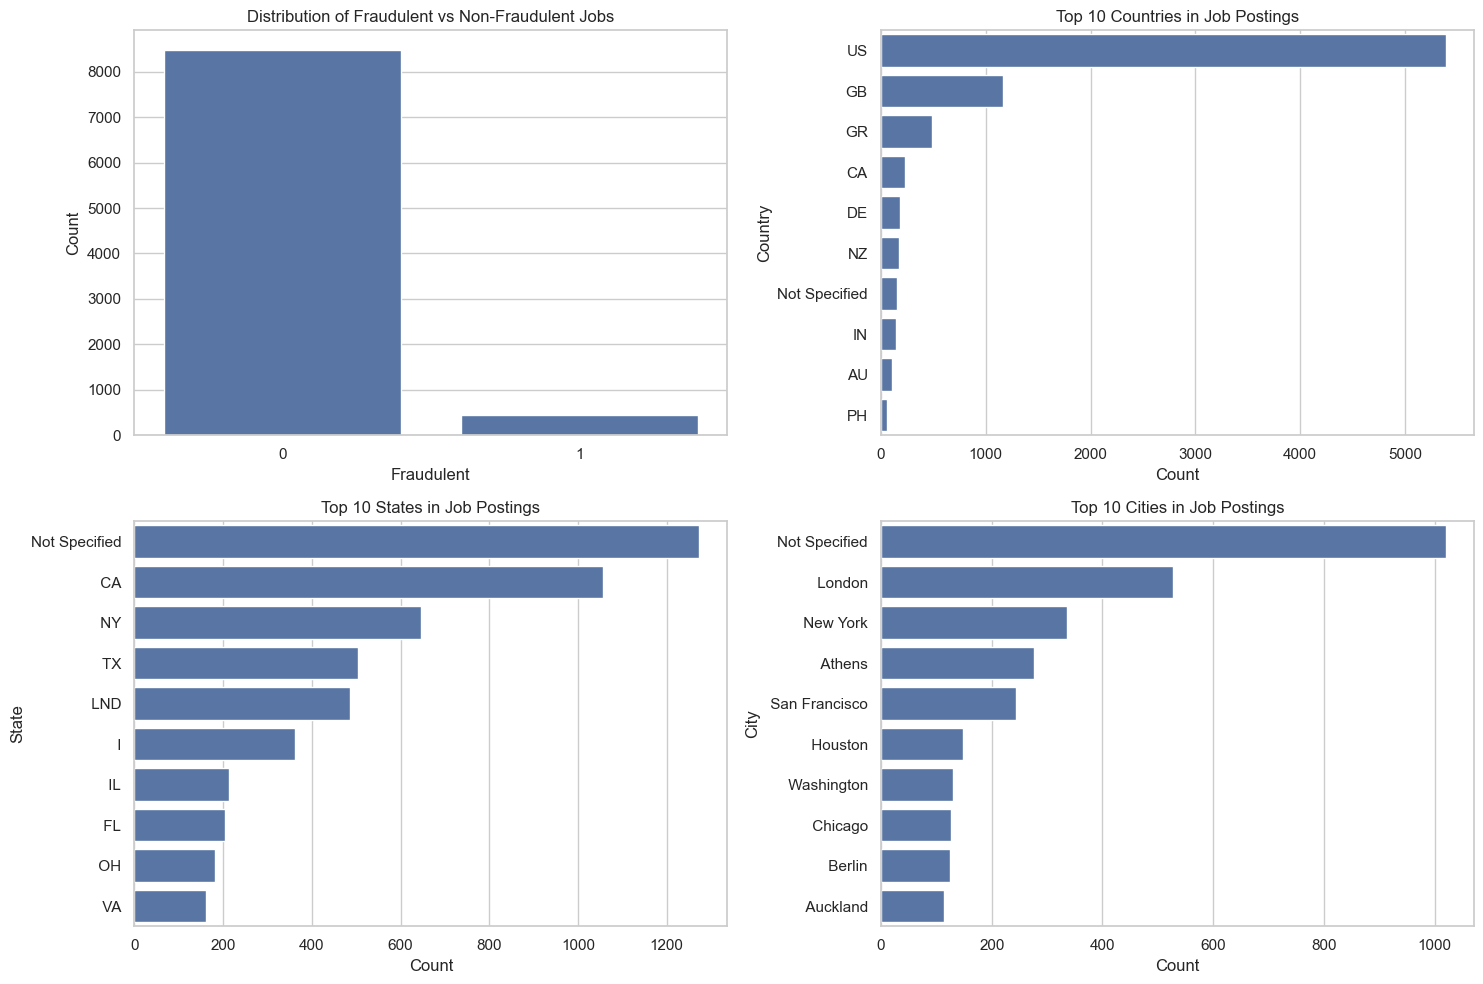

In [13]:
# Setting up the plotting environment
sns.set(style="whitegrid")

# Exploring the distribution of the 'fraudulent' column
fraudulent_dist = data['fraudulent'].value_counts()

# Exploring the distribution of the 'country', 'state', and 'city' columns
country_dist = data['country'].value_counts().head(10)
state_dist = data['state'].value_counts().head(10)
city_dist = data['city'].value_counts().head(10)

# Plotting
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x=fraudulent_dist.index, y=fraudulent_dist.values)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Jobs')
plt.xlabel('Fraudulent')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.barplot(x=country_dist.values, y=country_dist.index)
plt.title('Top 10 Countries in Job Postings')
plt.xlabel('Count')
plt.ylabel('Country')

plt.subplot(2, 2, 3)
sns.barplot(x=state_dist.values, y=state_dist.index)
plt.title('Top 10 States in Job Postings')
plt.xlabel('Count')
plt.ylabel('State')

plt.subplot(2, 2, 4)
sns.barplot(x=city_dist.values, y=city_dist.index)
plt.title('Top 10 Cities in Job Postings')
plt.xlabel('Count')
plt.ylabel('City')

plt.tight_layout()
plt.show()

In [14]:
# Distribution of Fraudulent vs Non-Fraudulent Jobs -- there is a significant imbalance between non-fraulent and fraudulent job postings, with fraudulent postings being much less frequent

# A few countries dominate the dataset in terms of job posting

# similar to countries, certain states are more represented than others. but the majority of records dont specify state or city

# Statistical Analysis

In [15]:
# Adding columns for length of description and length of requirements

data['description_length'] = data['description'].apply(len)
data['requirements_length'] = data['requirements'].apply(len)
data.head()



,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent,country,state,city,description_length,requirements_length
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0,KW,KU,Not Specified,825,784
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0,US,TX,Corpus Christi,774,6
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0,US,TX,USA Southwest,2285,2581
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0,AU,NSW,Not Specified,473,1073
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0,GB,ENG,London,728,428


In [16]:
import numpy as np

In [17]:
# In-depth Statistical Analysis of the Entire Dataset

# Descriptive statistics for the numerical columns
data.describe()

# Columns like telecommuting, has_company_logo, has_questions, and fraudulent are binary, showing counts, means, standard deviations, and other descriptive statistics relevant to binary data.
# The newly added description_length and requirements_length columns show a wide range of values, indicating variability in the length of job descriptions and requirements.



,telecommuting,has_company_logo,has_questions,fraudulent,description_length,requirements_length
count,8940.000000,8940.000000,8940.000000,8940.000000,8940.00000,8940.000000
mean,0.043736,0.794407,0.487248,0.051007,1212.63557,594.037696
std,0.204519,0.404157,0.499865,0.220024,895.66836,596.255307
min,0.000000,0.000000,0.000000,0.000000,6.00000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,597.00000,149.000000
50%,0.000000,1.000000,0.000000,0.000000,1008.00000,470.000000
75%,0.000000,1.000000,1.000000,0.000000,1577.00000,831.000000
max,1.000000,1.000000,1.000000,1.000000,12604.00000,6356.000000


In [18]:
# Correlation analysis with the target variable 'fraudulent'
numeric_data = data.select_dtypes(include=[np.number])
correlation_with_fraudulent = numeric_data.corr()['fraudulent'].sort_values()
correlation_with_fraudulent

# A strong negative correlation with the fraudulent variable, suggesting that postings without company logos are more likely to be fraudulent.
# Also negatively correlated, indicating that postings without questions are more likely to be fraudulent.
# These newly added length features show a negative correlation, albeit weaker than the other features. This suggests that shorter descriptions or requirements might be associated with fraudulent postings, but the relationship is not as strong as for other features.
# A positive but weak correlation with fraudulent, indicating a slight increase in likelihood of fraudulence for telecommuting jobs.

has_company_logo      -0.256953
has_questions         -0.098853
requirements_length   -0.062152
description_length    -0.022292
telecommuting          0.044889
fraudulent             1.000000
Name: fraudulent, dtype: float64

In [19]:
# Fraudulent vs Non-Fraudulent Comparison
fraudulent_data = data[data['fraudulent'] == 1]
non_fraudulent_data = data[data['fraudulent'] == 0]
mean_comparison = pd.DataFrame({
    'Fraudulent Mean': fraudulent_data[['description_length', 'requirements_length']].mean(),
    'Non-Fraudulent Mean': non_fraudulent_data[['description_length', 'requirements_length']].mean()
})
mean_comparison

# On average, fraudulent job postings have shorter descriptions and requirements compared to non-fraudulent postings.
# This suggests that the length of the job posting content might be a factor in determining its legitimacy.


,Fraudulent Mean,Non-Fraudulent Mean
description_length,1126.517544,1217.264262
requirements_length,434.199561,602.628713


In [20]:
# Outlier Detection in 'description_length' and 'requirements_length'
outliers_description = data['description_length'].quantile([0.25, 0.75])
iqr_description = outliers_description[0.75] - outliers_description[0.25]
outliers_requirements = data['requirements_length'].quantile([0.25, 0.75])
iqr_requirements = outliers_requirements[0.75] - outliers_requirements[0.25]

(iqr_description, iqr_requirements)



(980.0, 682.0)

In [21]:
# Binary Feature Analysis
binary_features = data[['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']].mean()
binary_features

# About 4.4% of job postings are telecommuting.
# Approximately 79.4% of job postings have a company logo.
# Around 48.7% of job postings have questions associated with them.
# The fraudulent rate in the dataset is about 5.1%.
# The presence of a company logo and questions in the job posting are more common in non-fraudulent jobs.
# The proportion of telecommuting jobs is relatively low, but their relation to fraudulence requires further investigation given the slight positive correlation.

telecommuting       0.043736
has_company_logo    0.794407
has_questions       0.487248
fraudulent          0.051007
dtype: float64

In [22]:
# Identifying outliers in 'description_length' and 'requirements_length'

# Calculating IQR for each feature
iqr_description = data['description_length'].quantile(0.75) - data['description_length'].quantile(0.25)
iqr_requirements = data['requirements_length'].quantile(0.75) - data['requirements_length'].quantile(0.25)

# Determining the boundaries for outliers
upper_bound_description = data['description_length'].quantile(0.75) + 1.5 * iqr_description
lower_bound_description = data['description_length'].quantile(0.25) - 1.5 * iqr_description
upper_bound_requirements = data['requirements_length'].quantile(0.75) + 1.5 * iqr_requirements
lower_bound_requirements = data['requirements_length'].quantile(0.25) - 1.5 * iqr_requirements

# Counting outliers
outliers_description_count = data[(data['description_length'] > upper_bound_description) | 
                                  (data['description_length'] < lower_bound_description)].shape[0]
outliers_requirements_count = data[(data['requirements_length'] > upper_bound_requirements) | 
                                   (data['requirements_length'] < lower_bound_requirements)].shape[0]

upper_bound_description, lower_bound_description, outliers_description_count, upper_bound_requirements, lower_bound_requirements, outliers_requirements_count

(3047.0, -873.0, 361, 1854.0, -874.0, 326)

In [23]:
# Capping the outliers in 'description_length' and 'requirements_length'
data['description_length_capped'] = data['description_length'].clip(upper=upper_bound_description)
data['requirements_length_capped'] = data['requirements_length'].clip(upper=upper_bound_requirements)

# Checking the effect of capping on the max values
max_description_capped = data['description_length_capped'].max()
max_requirements_capped = data['requirements_length_capped'].max()

max_description_capped, max_requirements_capped

(3047, 1854)

In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

# Function to preprocess text
def preprocess_text(text):
    # Tokenization and lowercasing
    tokens = re.findall(r'\b\w+\b', text.lower())
    # Removing stopwords
    tokens = [token for token in tokens if token not in ENGLISH_STOP_WORDS]
    return ' '.join(tokens)

# Applying the preprocessing to a sample of the descriptions and requirements
data['description_processed'] = data['description'].apply(preprocess_text)
data['requirements_processed'] = data['requirements'].apply(preprocess_text)
data[['description_processed', 'requirements_processed']].head()


,description_processed,requirements_processed
0,behalf client known multinational retail compa...,working technical knowledge systems fundamenta...
1,argenta field solutions rapidly expanding awar...,
2,experienced process controls staff engineer re...,10 years degreed professional experience minim...
3,passion people love sell telephone roles overv...,responsibilities prospecting following lead ge...
4,successful senior network engineer jncia certi...,essential skills juniper switching routing sec...


In [25]:
from collections import Counter
import itertools

# Function to calculate word frequency
def word_frequency(texts):
    words = list(itertools.chain(*[text.split() for text in texts]))
    return Counter(words)

# Calculating word frequency for fraudulent and non-fraudulent job postings
fraudulent_texts = data[data['fraudulent'] == 1][['description_processed', 'requirements_processed']]
non_fraudulent_texts = data[data['fraudulent'] == 0][['description_processed', 'requirements_processed']]

# Combining description and requirements for frequency analysis
fraudulent_combined_texts = fraudulent_texts['description_processed'] + ' ' + fraudulent_texts['requirements_processed']
non_fraudulent_combined_texts = non_fraudulent_texts['description_processed'] + ' ' + non_fraudulent_texts['requirements_processed']

# Word frequency distribution
fraudulent_word_freq = word_frequency(fraudulent_combined_texts)
non_fraudulent_word_freq = word_frequency(non_fraudulent_combined_texts)

# Displaying the top 10 most common words in each category
top_10_fraudulent = fraudulent_word_freq.most_common(10)
top_10_non_fraudulent = non_fraudulent_word_freq.most_common(10)

top_10_fraudulent, top_10_non_fraudulent


([('work', 819),
  ('experience', 714),
  ('skills', 556),
  ('amp', 500),
  ('team', 349),
  ('management', 340),
  ('ability', 326),
  ('position', 312),
  ('time', 297),
  ('service', 292)],
 [('experience', 16741),
  ('work', 12034),
  ('team', 11698),
  ('skills', 8520),
  ('s', 8347),
  ('business', 7330),
  ('sales', 6673),
  ('customer', 6579),
  ('development', 6089),
  ('new', 5935)])

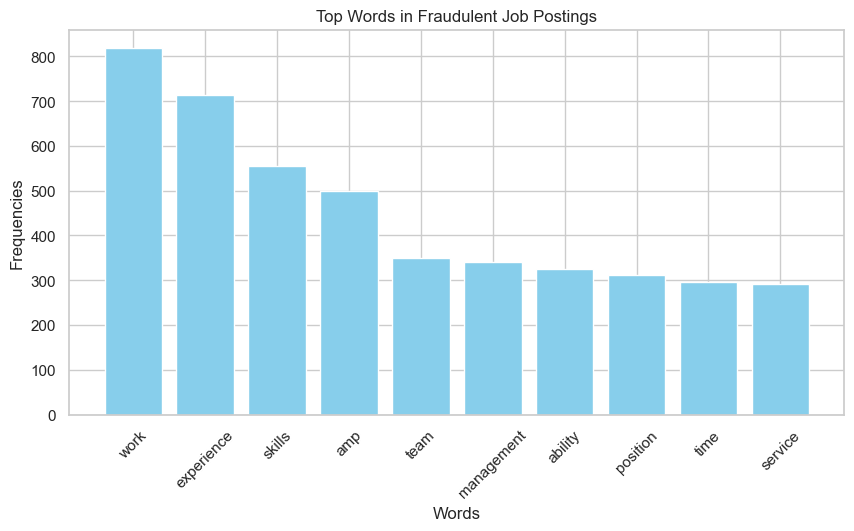

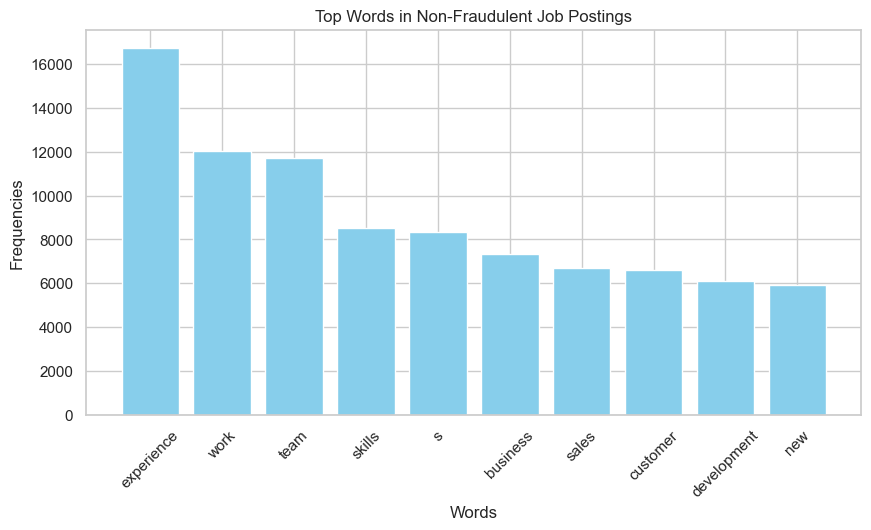

In [26]:
import matplotlib.pyplot as plt

def plot_word_frequencies(word_freq, title):
    words, frequencies = zip(*word_freq)  # Unzipping the words and frequencies
    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies, color='skyblue')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.show()

# Example usage
plot_word_frequencies(top_10_fraudulent, 'Top Words in Fraudulent Job Postings')
plot_word_frequencies(top_10_non_fraudulent, 'Top Words in Non-Fraudulent Job Postings')


In [27]:
data

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent,country,state,city,description_length,requirements_length,description_length_capped,requirements_length_capped,description_processed,requirements_processed
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0,KW,KU,Not Specified,825,784,825,784,behalf client known multinational retail compa...,working technical knowledge systems fundamenta...
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0,US,TX,Corpus Christi,774,6,774,6,argenta field solutions rapidly expanding awar...,
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0,US,TX,USA Southwest,2285,2581,2285,1854,experienced process controls staff engineer re...,10 years degreed professional experience minim...
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0,AU,NSW,Not Specified,473,1073,473,1073,passion people love sell telephone roles overv...,responsibilities prospecting following lead ge...
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0,GB,ENG,London,728,428,728,428,successful senior network engineer jncia certi...,essential skills juniper switching routing sec...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,Financial Analyst,"GR, I, Paiania","Financial analysis, reporting and review of de...",Postgraduate degree required. Economics or Fin...,0,1,1,0,GR,I,Paiania,714,483,714,483,financial analysis reporting review department...,postgraduate degree required economics finance...
8936,Customer Service Associate - Part Time,"CA, ON, Peterborough",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,0,1,0,0,CA,ON,Peterborough,1224,714,1224,714,customer service associate based peterborough ...,minimum requirements minimum 6 months customer...
8937,Sales Manager,"UA, 61, Ternopil","Responsibilitiesactive sales, realization of c...",Main requirementsexperience with Sales (2+ yea...,0,0,1,0,UA,61,Ternopil,514,308,514,308,responsibilitiesactive sales realization compa...,main requirementsexperience sales 2 years flue...
8938,Administrative Assistant,"US, CA, Santa Ana",In addition to clerical and administrative du...,Not Specified,0,0,0,1,US,CA,Santa Ana,175,13,175,13,addition clerical administrative duties indivi...,specified


# Statistical analysis of features w.r.t. target variable

In [28]:
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [29]:
data

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent,country,state,city,description_length,requirements_length,description_length_capped,requirements_length_capped,description_processed,requirements_processed
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0,KW,KU,Not Specified,825,784,825,784,behalf client known multinational retail compa...,working technical knowledge systems fundamenta...
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0,US,TX,Corpus Christi,774,6,774,6,argenta field solutions rapidly expanding awar...,
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0,US,TX,USA Southwest,2285,2581,2285,1854,experienced process controls staff engineer re...,10 years degreed professional experience minim...
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0,AU,NSW,Not Specified,473,1073,473,1073,passion people love sell telephone roles overv...,responsibilities prospecting following lead ge...
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0,GB,ENG,London,728,428,728,428,successful senior network engineer jncia certi...,essential skills juniper switching routing sec...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,Financial Analyst,"GR, I, Paiania","Financial analysis, reporting and review of de...",Postgraduate degree required. Economics or Fin...,0,1,1,0,GR,I,Paiania,714,483,714,483,financial analysis reporting review department...,postgraduate degree required economics finance...
8936,Customer Service Associate - Part Time,"CA, ON, Peterborough",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,0,1,0,0,CA,ON,Peterborough,1224,714,1224,714,customer service associate based peterborough ...,minimum requirements minimum 6 months customer...
8937,Sales Manager,"UA, 61, Ternopil","Responsibilitiesactive sales, realization of c...",Main requirementsexperience with Sales (2+ yea...,0,0,1,0,UA,61,Ternopil,514,308,514,308,responsibilitiesactive sales realization compa...,main requirementsexperience sales 2 years flue...
8938,Administrative Assistant,"US, CA, Santa Ana",In addition to clerical and administrative du...,Not Specified,0,0,0,1,US,CA,Santa Ana,175,13,175,13,addition clerical administrative duties indivi...,specified


In [30]:
# Assuming 'data' is your DataFrame and 'fraudulent' is the target column
X = data.drop('fraudulent', axis=1)
y = data['fraudulent']

In [31]:
# For numeric features: Calculate Pearson correlation
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
correlations = data[numeric_cols].corrwith(y)

In [32]:
# For categorical features: Chi-square test
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
chi2_results = pd.Series(index=categorical_cols)
for col in categorical_cols:
    contingency_table = pd.crosstab(X[col], y)
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[col] = p

In [33]:
# Display results
print("Correlation with Numeric Features:\n", correlations)
print("\nP-values from Chi-Square Test:\n", chi2_results)

Correlation with Numeric Features:
 telecommuting                 0.044889
has_company_logo             -0.256953
has_questions                -0.098853
description_length           -0.022292
requirements_length          -0.062152
description_length_capped    -0.030661
requirements_length_capped   -0.072310
dtype: float64

P-values from Chi-Square Test:
 title                      9.857651e-65
location                  4.894128e-211
description                2.663935e-19
requirements               2.694809e-20
country                    1.930967e-41
state                      1.036780e-46
city                      6.954969e-195
description_processed      4.573262e-24
requirements_processed     7.643281e-24
dtype: float64
